In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/stocks.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9
0,-0.020195,-0.005485,-0.019498,0.024145,-0.013656,0.031478,0.026964,0.015120,-0.037719,0.028160
1,0.013504,0.020774,-0.014953,0.042760,0.000546,-0.002150,-0.044521,0.008070,0.011728,0.028515
2,0.013324,0.018568,-0.010172,0.049762,0.003340,0.003406,0.021505,0.002853,-0.027456,0.029710
3,-0.008766,-0.014985,-0.021028,0.002851,-0.001291,-0.001524,0.025731,-0.002378,0.000314,-0.020410
4,-0.001164,0.020023,-0.001938,-0.001474,-0.003027,-0.008048,-0.028506,-0.010002,-0.005644,-0.010044
...,...,...,...,...,...,...,...,...,...,...
1994,0.002295,-0.026606,-0.019807,0.002365,-0.011904,-0.002814,-0.005084,0.018813,0.021484,-0.014436
1995,-0.004579,0.001477,0.032896,0.006460,-0.002616,-0.011049,-0.012653,0.020951,0.011950,0.027042
1996,0.009283,-0.039587,-0.009676,0.015069,-0.013270,0.008319,-0.008590,-0.003340,-0.008975,-0.028250
1997,-0.008465,-0.041859,-0.004481,0.025456,-0.032824,0.007170,0.011931,0.028737,-0.004290,-0.036692


#Task 1


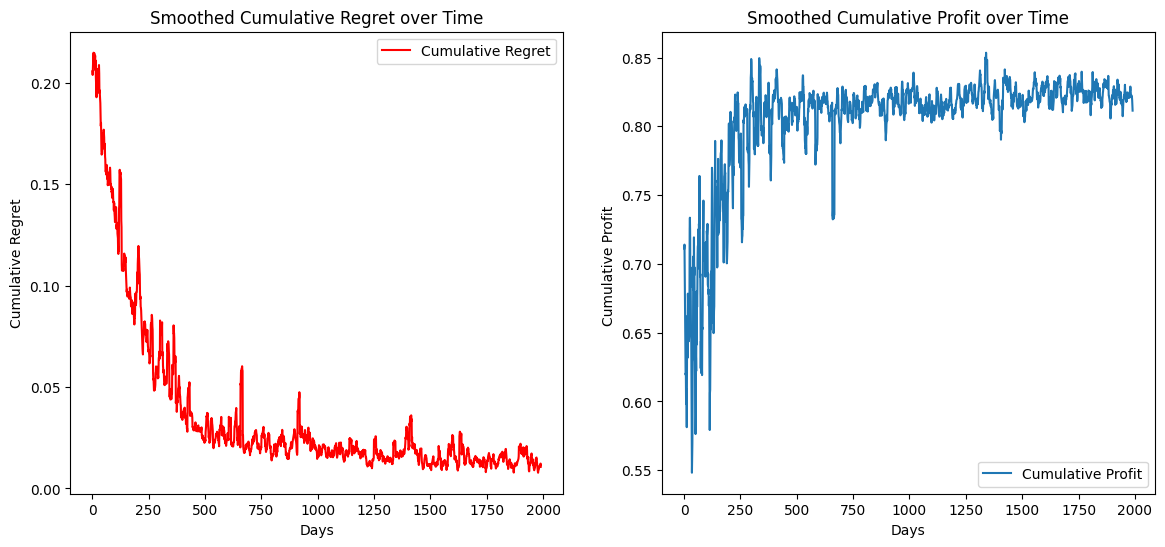

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)

# Load data
data = pd.read_csv('/content/drive/MyDrive/stocks.csv', header = None)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization to the data
normalized_data = scaler.fit_transform(data)

# Convert normalized data to a DataFrame
normalized_df = pd.DataFrame(normalized_data)

# Get the number of time steps (rows) and experts (columns)
T, K = normalized_df.shape

# Initialize weights and probabilities
weights = np.ones(K)
probabilities = np.ones(K) / np.sum(np.ones(K))  # Start with uniform probabilities

# Initialize cumulative profit, regret, and losses
cumulative_profit = np.zeros(T)
cumulative_regret = np.zeros(T)
# eta = np.sqrt(np.log(K) / T)

# Initialize regret array
regret = np.zeros(T)

# Smoothing window size
window_size = 10

for t in range(T):
    # Calculate loss for all stocks at time step t
    loss = 1 - normalized_df.iloc[t, :]

    # Choose a stock based on the calculated probabilities
    chosen_stock = np.random.choice(np.arange(K), p=probabilities)

    # Calculate profit for the chosen stock
    profit = normalized_df.iloc[t, chosen_stock]
    cumulative_profit[t] +=  profit

    # Update weights for all experts
    for k in range(K):
        eta = np.sqrt(np.log(K+1) / T)
        weights[k] *= np.power((1 - eta), loss[k])

    # Calculate new probabilities
    probabilities = weights / np.sum(weights)

    # Calculate total loss for this time step
    L_alg = np.dot(probabilities, loss)
    L_min = np.min(loss)
    regret[t] = L_alg - L_min
    cumulative_regret[t] += regret[t]

# Smooth the cumulative profit and regret using rolling average
smoothed_cumulative_profit = np.convolve(cumulative_profit, np.ones(window_size)/window_size, mode='valid')
smoothed_cumulative_regret = np.convolve(cumulative_regret, np.ones(window_size)/window_size, mode='valid')

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(smoothed_cumulative_regret) + 1), smoothed_cumulative_regret, label='Cumulative Regret', color='red')
plt.xlabel('Days')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title('Smoothed Cumulative Regret over Time')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(smoothed_cumulative_profit) + 1), smoothed_cumulative_profit, label='Cumulative Profit')
plt.xlabel('Days')
plt.ylabel('Cumulative Profit ')
plt.legend()
plt.title('Smoothed Cumulative Profit over Time')

plt.show()


#Task 2

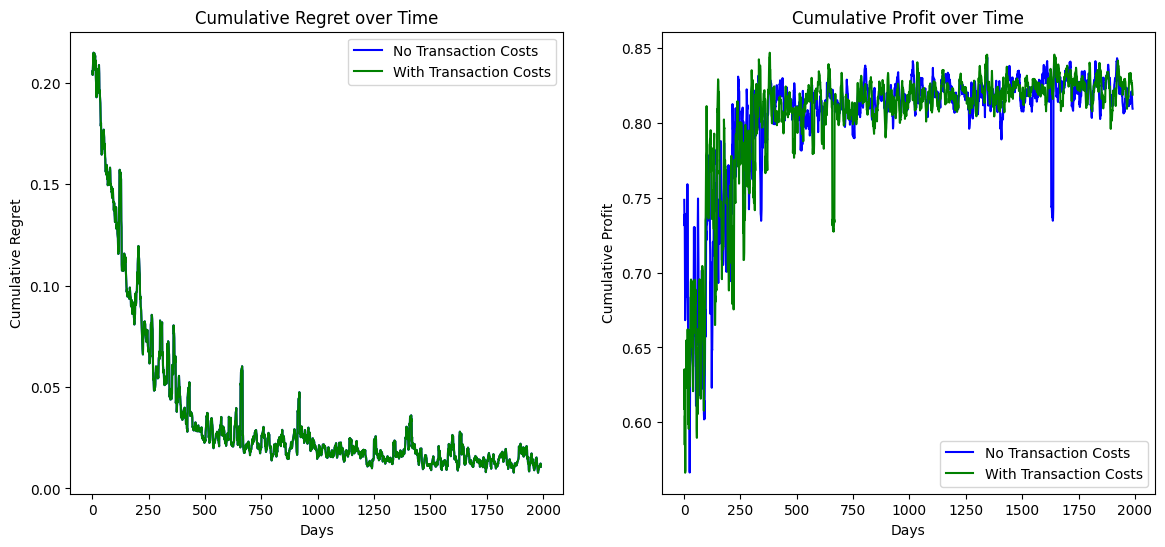

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)

# Load data
data = pd.read_csv('/content/drive/MyDrive/stocks.csv', header = None)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization to the data
normalized_data = scaler.fit_transform(data)

# Convert normalized data to a DataFrame
normalized_df = pd.DataFrame(normalized_data)

# Get the number of time steps (rows) and experts (columns)
T, K = normalized_df.shape
transaction_costs = np.linspace(0.005, 0.005 * K, K)

# Initialize weights and probabilities
weights_with_no_t_cost = np.ones(K)
weights_with_t_cost = np.ones(K)
probabilities_with_no_t_cost = np.ones(K) / np.sum(np.ones(K))
probabilities_with_t_cost = np.ones(K) / np.sum(np.ones(K))

# Initialize cumulative profit and regret arrays for both scenarios
cumulative_profit_no_costs = np.zeros(T)
cumulative_profit_with_costs = np.zeros(T)
cumulative_regret_no_costs = np.zeros(T)
cumulative_regret_with_costs = np.zeros(T)

# Smoothing window size
window_size = 10

for t in range(T):
    # Choose a stock based on the calculated probabilities
    chosen_stock_with_no_t_cost = np.random.choice(np.arange(K), p=probabilities_with_no_t_cost)
    chosen_stock_with_t_cost = np.random.choice(np.arange(K), p=probabilities_with_t_cost)

    # Calculate profit for the chosen stock
    profit_with_no_t_cost = normalized_df.iloc[t, chosen_stock_with_no_t_cost]
    profit_stock_with_t_cost = normalized_df.iloc[t, chosen_stock_with_t_cost]


    transaction_cost = transaction_costs[chosen_stock_with_t_cost]
    cumulative_profit_no_costs[t] += profit_with_no_t_cost

    # Calculate loss for all stocks at time step t
    loss_with_t_cost = 1 - (normalized_df.iloc[t, :] + transaction_cost)
    loss_with_no_t_cost = 1 - normalized_df.iloc[t, :]

    # Update cumulative profit considering transaction costs
    cumulative_profit_with_costs[t] += profit_stock_with_t_cost

    # Update weights for all experts
    for k in range(K):
        eta = np.sqrt(np.log(K + 1) / T)
        weights_with_no_t_cost[k] *= np.power(1 - eta, loss_with_no_t_cost[k])
        weights_with_t_cost[k] *= np.power(1 - eta, loss_with_t_cost[k])

    # Calculate new probabilities
    probabilities_with_no_t_cost = weights_with_no_t_cost / np.sum(weights_with_no_t_cost)
    probabilities_with_t_cost = weights_with_t_cost / np.sum(weights_with_t_cost)

    # Calculate total loss for this time step
    L_alg_with_no_t_cost = np.dot(probabilities_with_no_t_cost, loss_with_no_t_cost)
    L_alg_with_t_cost = np.dot(probabilities_with_t_cost, loss_with_t_cost)
    L_min_with_no_t_cost = np.min(loss_with_no_t_cost)
    L_min_with_t_cost = np.min(loss_with_t_cost)
    regret_with_no_t_cost = L_alg_with_no_t_cost - L_min_with_no_t_cost
    regret_with_t_cost = L_alg_with_t_cost - L_min_with_t_cost

    # Update cumulative regret for both scenarios
    cumulative_regret_no_costs[t] += regret_with_no_t_cost
    cumulative_regret_with_costs[t] += regret_with_t_cost

# Smooth the cumulative profit and regret using rolling average
smoothed_cumulative_profit_no_costs = np.convolve(cumulative_profit_no_costs, np.ones(window_size) / window_size, mode='valid')
smoothed_cumulative_profit_with_costs = np.convolve(cumulative_profit_with_costs, np.ones(window_size) / window_size, mode='valid')
smoothed_cumulative_regret_no_costs = np.convolve(cumulative_regret_no_costs, np.ones(window_size) / window_size, mode='valid')
smoothed_cumulative_regret_with_costs = np.convolve(cumulative_regret_with_costs, np.ones(window_size) / window_size, mode='valid')

# Plot results
plt.figure(figsize=(14, 6))

# Plot cumulative regret
plt.subplot(1, 2, 1)
plt.plot(range(1, len(smoothed_cumulative_regret_no_costs) + 1), smoothed_cumulative_regret_no_costs, label='No Transaction Costs', color='blue')
plt.plot(range(1, len(smoothed_cumulative_regret_with_costs) + 1), smoothed_cumulative_regret_with_costs, label='With Transaction Costs', color='green')
plt.xlabel('Days')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title('Cumulative Regret over Time')

# Plot cumulative profit
plt.subplot(1, 2, 2)
plt.plot(range(1, len(smoothed_cumulative_profit_no_costs) + 1), smoothed_cumulative_profit_no_costs, label='No Transaction Costs', color='blue')
plt.plot(range(1, len(smoothed_cumulative_profit_with_costs) + 1), smoothed_cumulative_profit_with_costs, label='With Transaction Costs', color='green')
plt.xlabel('Days')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.title('Cumulative Profit over Time')

plt.show()


#Task 3

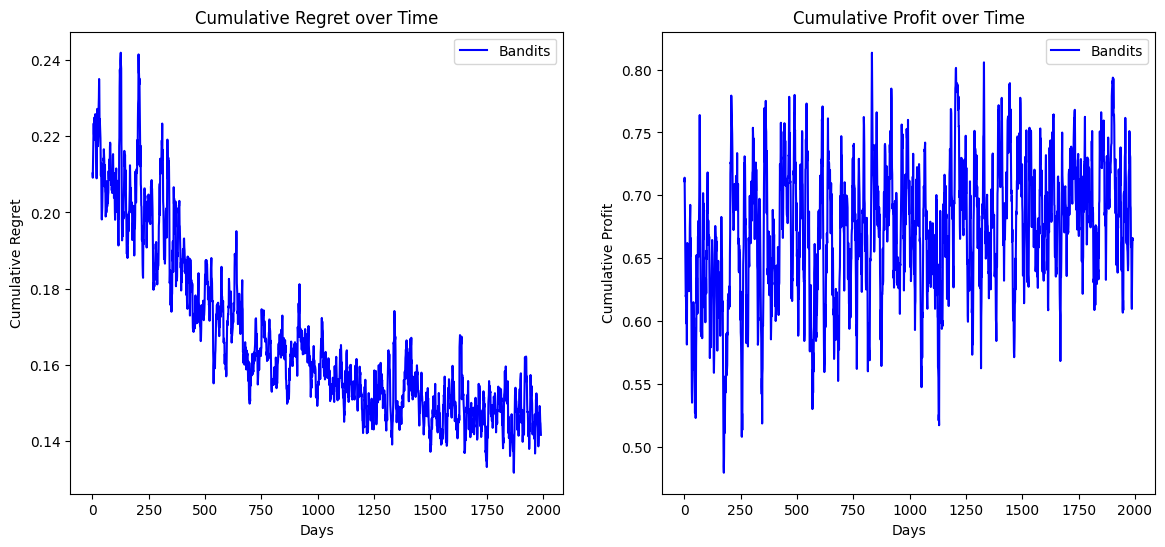

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)

# Load data
data = pd.read_csv('/content/drive/MyDrive/stocks.csv', header = None)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization to the data
normalized_data = scaler.fit_transform(data)

# Convert normalized data to a DataFrame
normalized_df = pd.DataFrame(normalized_data)

# Get the number of time steps (rows) and experts (columns)
T, K = normalized_df.shape
transaction_costs = np.linspace(0.005, 0.005 * K, K)

# Initialize weights and probabilities
weights = np.ones(K)
probabilities = np.ones(K) / np.sum(np.ones(K))

# Initialize cumulative profit and regret arrays
cumulative_profit = np.zeros(T)
cumulative_regret = np.zeros(T)

# Smoothing window size
window_size = 10

eta = np.sqrt(np.log(K) / T)

for t in range(T):
    # Choose a stock based on the calculated probabilities
    chosen_stock = np.random.choice(np.arange(K), p=probabilities)
    loss = 1 - normalized_df.iloc[t, :]  # Losses for all stocks at time t
    transaction_cost = transaction_costs[chosen_stock]

    # Calculate profit for the chosen stock
    profit = normalized_df.iloc[t, chosen_stock]

    # Update weight for the chosen stock
    weights[chosen_stock] *= np.power(1 - eta, loss[chosen_stock])

    # Calculate new probabilities
    probabilities = weights / np.sum(weights)

    # Calculate total loss for this time step
    L_alg = np.dot(probabilities, loss)
    L_min = np.min(loss)
    regret = L_alg - L_min
    cumulative_regret[t] += regret

    # Update cumulative profit considering transaction costs
    cumulative_profit[t] +=  profit

# Smooth the cumulative profit and regret using rolling average
smoothed_cumulative_profit = np.convolve(cumulative_profit, np.ones(window_size) / window_size, mode='valid')
smoothed_cumulative_regret = np.convolve(cumulative_regret, np.ones(window_size) / window_size, mode='valid')

# Plot results
plt.figure(figsize=(14, 6))

# Plot cumulative regret
plt.subplot(1, 2, 1)
plt.plot(range(1, len(smoothed_cumulative_regret) + 1), smoothed_cumulative_regret, label='Bandits', color='blue')
plt.xlabel('Days')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title('Cumulative Regret over Time')

# Plot cumulative profit
plt.subplot(1, 2, 2)
plt.plot(range(1, len(smoothed_cumulative_profit) + 1), smoothed_cumulative_profit, label='Bandits', color='blue')
plt.xlabel('Days')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.title('Cumulative Profit over Time')

plt.show()
